In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from numpy import cos,sin,pi,tan,log,exp,array,linspace,arange
from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection


plt.rcParams["figure.figsize"] = [7,7]

from numpy.linalg import norm

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

#### Quick exercise

What is the derivative of the parametrized line $$\vec r(t) = \vec p + t \vec v ?$$

##### Solution

$\vec v$

#### 
<div style="padding-bottom: 40%"></div>

## Examples

  1. Show that any moving particle that changes direction has a nonzero acceleration.
  

#### Solution 

If $\vec a(t) = \vec 0$, then $\vec v(t)$ is a constant and thus cannot change direction.
  

###   
  2. Is the converse true (i.e., a particle with nonzero acceleration must change direction?
  

#### Solution 

No. Take a particle speeding up along a straigt line like $\langle e^t, e^t, e^t \rangle$. Its velocity is always a scalar multiple of $\langle 1,1,1 \rangle$ but its acceleration is clearly not $\vec 0$.

### <div style="padding-bottom: 40%"></div>

## Example

A particle initially at rest at the origin is subjected to an acceleration $$\vec a(t) = \begin{cases} \vec i -  t\,\vec j, & t\leq 6 \\ \vec 0, & t > 6 \end{cases}.$$ Find its position at $t=10$.

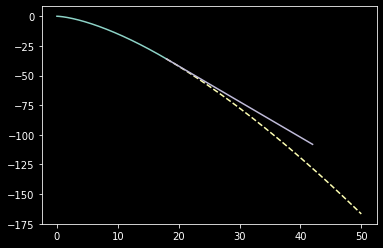

In [36]:
t = np.linspace(0,6,201)
plt.plot(1/2*t**2,-t**3/6)
t = np.linspace(6,10,201)
plt.plot(1/2*t**2,-t**3/6,'--')
plt.plot(18 + 6*(t-6),-36 - 18*(t-6),'-');


#### Solution

$$\vec v(t) = \int_0^t \vec a(\tau)\,d\tau  = \begin{cases} t\,\vec i -  \frac{t^2}{2}\,\vec j, & t\leq 6 \\ \vec v(6), & t > 6 \end{cases} $$

$$= \begin{cases} t\,\vec i -  \frac{t^2}{2}\,\vec j, & t\leq 6 \\ 6\,\vec i - 18\,\vec j, & t > 6 \end{cases}$$

$$\vec x(t) = \int_0^t \vec v(\tau)\,d\tau  = \begin{cases} \frac{t^2}{2}\,\vec i -  \frac{t^3}{6}\,\vec j, & t\leq 6 \\ \vec x(6) + \vec v(6)(t - 6), & t > 6 \end{cases} $$

$$=\begin{cases} \frac{t^2}{2}\,\vec i -  \frac{t^3}{6}\,\vec j, & t\leq 6 \\ (6t - 18)\vec i + (72 - 18t)\vec j, & t > 6 \end{cases}$$

<div style="padding-bottom: 40%"></div>